In [ ]:
# chimp
# homo eractus - walking hunting
# cooking
# clothing
# homo sapiens - speaking?
# stone age - agriculture, domestication
# bronze age - trade and war
# iron age - empires
# spices
# age of exploration
# industrial revolution
# 

In [3]:
! pip install xlrd

  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl
You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [335]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
# can see gdp growth just by looking at jobs
# farmer income
# service employee income
# industry employee income
# what about trade?
# you have trader income - but then you also have companies
# 
df = pd.read_excel('data/employment/national_M2018_dl.xlsx')

In [7]:
major_df = df[df.OCC_GROUP=='major']

In [19]:
major_df['deviation'] = major_df['A_MEAN']/major_df['A_MEDIAN']

/Users/jordanvalansi/.virtualenv/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
major_df.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,...,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,deviation
1,11-0000,Management Occupations,major,7616650,0.2,58.44,121560,0.1,23.68,34.08,...,72.93,#,49260,70880,104240,151700,#,NaN,NaN,1.16616
70,13-0000,Business and Financial Operations Occupations,major,7721300,0.3,36.98,76910,0.2,18.33,24.53,...,44.65,59.44,38130,51020,68350,92870,123640,NaN,NaN,1.12524
126,15-0000,Computer and Mathematical Occupations,major,4384300,0.5,44.01,91530,0.4,21.41,29.64,...,55.98,71.12,44530,61640,86340,116440,147920,NaN,NaN,1.06011
158,17-0000,Architecture and Engineering Occupations,major,2556220,0.5,42.01,87370,0.3,21.33,28.72,...,51.81,66.98,44360,59750,80170,107760,139320,NaN,NaN,1.08981
218,19-0000,"Life, Physical, and Social Science Occupations",major,1171910,0.7,36.62,76160,0.4,16.85,22.74,...,45.77,61.22,35050,47310,66070,95210,127340,NaN,NaN,1.15272


In [117]:
major_df['Total'] = major_df['TOT_EMP']*major_df['A_MEAN']

/Users/jordanvalansi/.virtualenv/notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
major_df[['OCC_TITLE', 'TOT_EMP', 'A_MEAN', 'deviation', 'Total']].sort_values(by='Total', ascending=False)

,OCC_TITLE,TOT_EMP,A_MEAN,deviation,Total
1,Management Occupations,7616650,121560,1.16616,925879974000
802,Office and Administrative Support Occupations,21828990,38990,1.09032,851112320100
489,Healthcare Practitioners and Technical Occupat...,8646730,82000,1.2342,709031860000
759,Sales and Related Occupations,14542290,41790,1.48297,607722299100
70,Business and Financial Operations Occupations,7721300,76910,1.12524,593845183000
331,"Education, Training, and Library Occupations",8779780,56620,1.13924,497111143600
126,Computer and Mathematical Occupations,4384300,91530,1.06011,401294979000
1284,Transportation and Material Moving Occupations,10244260,38290,1.16987,392252715400
1118,Production Occupations,9115530,39190,1.11748,357237620700
647,Food Preparation and Serving Related Occupations,13374620,25580,1.1088,342122779600


In [125]:
major_df['Total'].sum() / major_df['TOT_EMP'].sum() 

51944.62018102401

In [135]:
import matplotlib.pyplot as plt
import numpy as np

In [150]:
y, x = np.histogram(major_df['A_MEAN'], bins=5)

In [151]:
x

array([25580.0, 44776.0, 63972.0, 83168.0, 102364.0, 121560.0],
      dtype=object)

In [152]:
y

array([9, 6, 3, 2, 2])

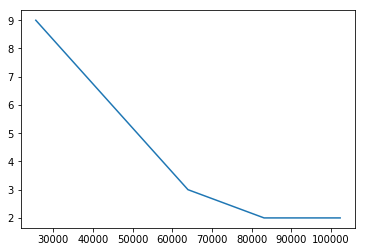

In [155]:
plt.plot(x[:-1],y)

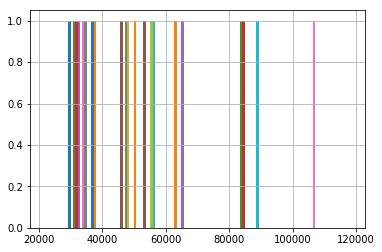

In [134]:
major_df['A_MEAN'].hist(bins=[20000, 40000, 60000, 80000, 100000, 120000])

In [ ]:
# GDP is:
# salaries
# company revenue - or private expenditure (spending)
# goverment income - or tax

In [32]:
expenditure_df = pd.read_csv('data/expenditure.csv', skiprows=list(range(4))+[5])

In [33]:
expenditure_df.head()

,Line,Unnamed: 1,2011,2012,2013,2014,2015,2016,2017,2018
0,1,Personal consumption expenditures,98.519,100.000,101.454,104.457,108.308,111.272,114.174,117.605
1,2,Goods,97.913,100.000,103.147,107.351,112.393,116.464,121.048,125.993
2,3,Durable goods,94.359,100.000,106.106,113.751,122.248,129.713,138.648,147.326
3,4,Motor vehicles and parts,93.326,100.000,104.707,110.794,118.933,122.615,128.878,134.403
4,5,New motor vehicles (55),89.237,100.000,104.155,109.603,113.869,112.741,115.803,119.356


In [ ]:
expenditure_df

In [ ]:
expenditure_df[.iloc[0]

In [46]:
expenditure_df_ = pd.read_csv('data/SNA_TABLE5_11082019194329427.csv')

In [53]:
us_expenditure_df = expenditure_df_[(expenditure_df_.LOCATION=='USA') & (expenditure_df_.TIME==2017) & (expenditure_df_.MEASURE=='C')]

In [62]:
us_expenditure_df = us_expenditure_df.dropna(axis=1)

In [67]:
num_of_households = 127.59

In [70]:
us_expenditure_df['per household'] = us_expenditure_df['Value']//num_of_households

In [72]:
us_expenditure_df['per month'] = us_expenditure_df['per household']//12

In [78]:
top_level_expenditure = us_expenditure_df[us_expenditure_df['TRANSACT'].apply(lambda x: x.endswith('0'))]

In [81]:
top_level_expenditure['per month'].sum()

8458.0

In [113]:
drop_constants(top_level_expenditure).sort_values('Value', ascending=False)

,TRANSACT,Transaction,Value,per household,per month
59994,P31CP060,Health,2829094.0,22173.0,1847.0
59894,P31CP040,"Housing, water, electricity, gas and other fuels",2464848.0,19318.0,1609.0
60074,P31CP120,Miscellaneous goods and services,1828664.0,14332.0,1194.0
60004,P31CP070,Transport,1225238.0,9602.0,800.0
60044,P31CP090,Recreation and culture,1171381.0,9180.0,765.0
60064,P31CP110,Restaurants and hotels,897294.0,7032.0,586.0
59493,P31CP010,Food and non-alcoholic beverages,830017.0,6505.0,542.0
59904,P31CP050,"Furnishings, households equipment and routine ...",531548.0,4166.0,347.0
59774,P31CP030,Clothing and footwear,395731.0,3101.0,258.0
60054,P31CP100,Education,280837.0,2201.0,183.0


In [84]:
import re

In [103]:
detailed_expenditure = us_expenditure_df[us_expenditure_df['TRANSACT'].apply(lambda x: bool(re.match('^P31CP\d\d[1-9]$', x)))]

In [104]:
bool(re.match('P31CP\d$',us_expenditure_df['TRANSACT'].loc[60024]))

False

In [110]:
def drop_constants(df):
    nunique = df.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    return df.drop(cols_to_drop, axis=1)



In [111]:
drop_constants(detailed_expenditure).sort_values('Value', ascending=False)

,TRANSACT,Transaction,Value,per household,per month
59714,P31CP042,Imputed rentals for housing,1558667.0,12216.0,1018.0
59794,P31CP063,Hospital services,1241966.0,9734.0,811.0
59684,P31CP062,Out-patient services,1029204.0,8066.0,672.0
59613,P31CP111,Catering services,752962.0,5901.0,491.0
59503,P31CP011,Food,737407.0,5779.0,481.0
59964,P31CP126,Financial services n. e. c.,679654.0,5326.0,443.0
59674,P31CP072,Operation of personal transport equipment,650451.0,5097.0,424.0
59523,P31CP041,Actual rentals for housing,565182.0,4429.0,369.0
59553,P31CP061,"Medical products, appliances and equipment",557924.0,4372.0,364.0
59563,P31CP071,Purchase of vehicles,425369.0,3333.0,277.0


In [109]:
detailed_expenditure['per month'].sum()

8442.0

# From BEA

In [91]:
import pybea

In [25]:
from pybea import api

In [55]:
import requests

In [312]:
from slugify import slugify

In [59]:
base_url = "https://apps.bea.gov/api/data"

In [87]:
pybea.api.Request.base_url = base_url

In [40]:
USER_ID = "9ACF113E-22D9-43B6-B56E-162BD6BD55BA"

In [96]:
data = pybea.get_data(USER_ID,
                      DataSetName='NIPA',
                      TableName='T20405',
                      Frequency=['A'],
                      Year='2020',
                      ResultFormat="XML"
                      )

In [305]:
data.head()

,TableName,SeriesCode,LineNumber,LineDescription,TimePeriod,CL_UNIT,UNIT_MULT,METRIC_NAME,DataValue
0,T20405,DPCERC,1,Personal consumption expenditures,2020,Level,6,Current Dollars,14047565.0
1,T20405,DGDSRC,2,Goods,2020,Level,6,Current Dollars,4653822.0
2,T20405,DDURRC,3,Durable goods,2020,Level,6,Current Dollars,1616408.0
3,T20405,DMOTRC,4,Motor vehicles and parts,2020,Level,6,Current Dollars,541265.0
4,T20405,DNMVRC,5,New motor vehicles (55),2020,Level,6,Current Dollars,292908.0


In [174]:
df = pd.read_csv('data/bea_t20405.csv', skiprows=4, index_col=0)

In [176]:
df['indent'] = df['Unnamed: 1'].apply(lambda x: (len(x)-len(x.lstrip()))//4 if type(x)==str else 0)

In [142]:
df = df.dropna()

In [178]:
ind = df.reset_index()[df.reset_index()['Unnamed: 1']=="Additional aggregates:"].index[0]

In [184]:
df = df.iloc[1:ind,:]

In [307]:
# df[df['indent']==7].head()

In [197]:
df = pd.read_csv('data/bea_20305.xls', skiprows=4, index_col=0)

In [199]:
ind = df.reset_index()[df.reset_index()['Unnamed: 1']=="Addenda:"].index[0]

In [201]:
df = df.iloc[1:ind,:]

In [203]:
df['indent'] = df['Unnamed: 1'].apply(lambda x: (len(x)-len(x.lstrip()))//4 if type(x)==str else 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
num_of_consumers = 330

In [213]:
df['per unit'] = df['2020']/num_of_consumers

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
base_url = "https://stats.oecd.org/SDMX-JSON/data/SNA_TABLE5"

In [274]:
countries = "+".join(["USA"])
dims = "P31NC+P31DC+P31CP010+P31CP011+P31CP012+P31CP020+P31CP021+P31CP022+P31CP023+P31CP030+P31CP031+P31CP032+P31CP040+P31CP041+P31CP042+P31CP043+P31CP044+P31CP045+P31CP050+P31CP051+P31CP052+P31CP053+P31CP054+P31CP055+P31CP056+P31CP060+P31CP061+P31CP062+P31CP063+P31CP070+P31CP071+P31CP072+P31CP073+P31CP080+P31CP081+P31CP082+P31CP083+P31CP090+P31CP091+P31CP092+P31CP093+P31CP094+P31CP095+P31CP096+P31CP100+P31CP101+P31CP102+P31CP103+P31CP104+P31CP105+P31CP110+P31CP111+P31CP112+P31CP120+P31CP121+P31CP122+P31CP123+P31CP124+P31CP125+P31CP126+P31CP127+P31CP122_127+P311+P312+P313+P311B+P312B+P313B+P314B+P33+P34+B1_GE"
measure = "C" #+V+VP+VOB+VPVOB"
q = "all"

In [264]:
params = {"startTime":"2008", "endTime":"2020", "dimensionAtObservation":"allDimensions"}

In [265]:
params = {"startTime":"2019", "endTime":"2020"}

In [275]:
req = requests.Request("GET",base_url+'/'+countries+'.'+dims+'.'+measure+'/'+q, params=params)

In [267]:
prep = req.prepare()

In [268]:
def pretty_print_POST(req):
    """
    At this point it is completely built and ready
    to be fired; it is "prepared".

    However pay attention at the formatting used in 
    this function because it is programmed to be pretty 
    printed and may differ from the actual request.
    """
    print('{}\n{}\r\n{}\r\n\r\n{}'.format(
        '-----------START-----------',
        req.method + ' ' + req.url,
        '\r\n'.join('{}: {}'.format(k, v) for k, v in req.headers.items()),
        req.body,
    ))

In [269]:
pretty_print_POST(prep)

-----------START-----------
GET https://stats.oecd.org/SDMX-JSON/data/SNA_TABLE5/USA.P31NC+P31DC+P31CP010+P31CP011+P31CP012+P31CP020+P31CP021+P31CP022+P31CP023+P31CP030+P31CP031+P31CP032+P31CP040+P31CP041+P31CP042+P31CP043+P31CP044+P31CP045+P31CP050+P31CP051+P31CP052+P31CP053+P31CP054+P31CP055+P31CP056+P31CP060+P31CP061+P31CP062+P31CP063+P31CP070+P31CP071+P31CP072+P31CP073+P31CP080+P31CP081+P31CP082+P31CP083+P31CP090+P31CP091+P31CP092+P31CP093+P31CP094+P31CP095+P31CP096+P31CP100+P31CP101+P31CP102+P31CP103+P31CP104+P31CP105+P31CP110+P31CP111+P31CP112+P31CP120+P31CP121+P31CP122+P31CP123+P31CP124+P31CP125+P31CP126+P31CP127+P31CP122_127+P311+P312+P313+P311B+P312B+P313B+P314B+P33+P34+B1_GE.C/all?startTime=2019&endTime=2020


None


In [270]:
sess = requests.Session()

In [271]:
res = sess.send(prep)

In [272]:
j = res.json()

In [280]:
# from https://data.oecd.org/searchresults/?hf=20&b=0&r=f%2Ftype%2Fdatasets%2Fapi+access&r=%2Bf%2Ftopics_en%2Feconomy&s=desc(document_publicationdate)&l=en

In [278]:
df = pd.read_csv('data/SNA_TABLE5_15122021034126906.csv')

In [282]:
df = df.sort_values('TRANSACT')

In [308]:
df.head()

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
16,USA,United States,B1_GE,Gross domestic product (expenditure approach),C,Current prices,2020,2020,USD,US Dollar,6,Millions,NaN,NaN,20893746,NaN,NaN
60,USA,United States,P311B,Durable goods,C,Current prices,2020,2020,USD,US Dollar,6,Millions,NaN,NaN,1289681,NaN,NaN
61,USA,United States,P312B,Semi-durable goods,C,Current prices,2020,2020,USD,US Dollar,6,Millions,NaN,NaN,820380,NaN,NaN
62,USA,United States,P313B,Non-durable goods,C,Current prices,2020,2020,USD,US Dollar,6,Millions,NaN,NaN,2532650,NaN,NaN
63,USA,United States,P314B,Services,C,Current prices,2020,2020,USD,US Dollar,6,Millions,NaN,NaN,8893484,NaN,NaN


In [284]:
stock_dfs = pd.read_html('https://www.tradingview.com/markets/stocks-usa/sectorandindustry-industry/')

In [286]:
stock_df = stock_dfs[0]

In [291]:
stock_df.columns = ['industry', 'market cap', 'div', 'change', 'volume', 'sector', 'stocks', 'NA1', 'NA2']

In [289]:
num_d = {"M":10**6, "B":10**9, "T":10**12}

In [372]:
def to_num(x):
        try:
            return float(x[:-1])*num_d[x[-1]]
        except:
            return None

In [299]:
stock_df['market cap num'] = stock_df['market cap'].apply(lambda x: )

In [309]:
stock_df = stock_df.sort_values('market cap num')

In [313]:
stock_df['industry slug'] = stock_df['industry'].apply(slugify)

In [314]:
stock_df.head()

,industry,market cap,div,change,volume,sector,stocks,NA1,NA2,market cap num,industry slug
18,Catalog/Specialty Distribution,162.904M,—,-2.75%,240.430K,Retail Trade,2,NaN,NaN,1.629040e+08,catalog-specialty-distribution
82,Miscellaneous,2.426B,—,1.88%,2.721M,Miscellaneous,13,NaN,NaN,2.426000e+09,miscellaneous
121,Textiles,3.868B,—,0.95%,214.951K,Process Industries,4,NaN,NaN,3.868000e+09,textiles
28,Consumer Sundries,5.262B,—,0.59%,195.396K,Consumer Non-Durables,4,NaN,NaN,5.262000e+09,consumer-sundries
94,Other Consumer Specialties,7.600B,—,-0.39%,180.709K,Consumer Durables,7,NaN,NaN,7.600000e+09,other-consumer-specialties


In [322]:
slug = stock_df.loc[2, 'industry slug']

In [323]:
slug

'agricultural-commodities-milling'

In [367]:
def get_mean_pe(slug):
    slug_dfs = pd.read_html('https://www.tradingview.com/markets/stocks-usa/sectorandindustry-industry/'+slug)

    slug_df = slug_dfs[0]

    pes = pd.to_numeric(slug_df['Unnamed: 8'], errors='coerce')
    mcs = slug_df['Unnamed: 7'].apply(to_num)
    return (pes*mcs).sum()/mcs.sum()

    

In [373]:
stock_df['mean pe'] = stock_df['industry slug'].progress_apply(get_mean_pe)

In [374]:
stock_df['earnings'] = stock_df['market cap num']/stock_df['mean pe']

In [379]:
stock_df['earnings'].replace([np.inf, -np.inf], np.nan).sum()/10**12

2.5834953722982466

In [375]:
stock_df.sort_values('earnings', ascending=False).iloc[:10]

,industry,market cap,div,change,volume,sector,stocks,NA1,NA2,market cap num,industry slug,mean pe,earnings
18,Catalog/Specialty Distribution,162.904M,—,-2.75%,240.430K,Retail Trade,2,NaN,NaN,1.629040e+08,catalog-specialty-distribution,0.000000,inf
77,Media Conglomerates,22.990B,—,0.71%,4.650M,Consumer Services,3,NaN,NaN,2.299000e+10,media-conglomerates,0.000000,inf
73,Major Banks,2677.564B,—,0.01%,15.316M,Finance,65,NaN,NaN,2.677564e+12,major-banks,13.244874,2.021585e+11
87,Multi-Line Insurance,1592.260B,—,-0.23%,2.590M,Finance,29,NaN,NaN,1.592260e+12,multi-line-insurance,8.144100,1.955109e+11
68,Internet Software/Services,5946.864B,—,1.63%,5.900M,Technology Services,149,NaN,NaN,5.946864e+12,internet-software-services,32.653586,1.821198e+11
71,Investment Trusts/Mutual Funds,269.874B,—,0.38%,2.846M,Miscellaneous,3210,NaN,NaN,2.698740e+11,investment-trusts-mutual-funds,1.614446,1.671620e+11
97,Packaged Software,5940.530B,—,2.02%,18.058M,Technology Services,312,NaN,NaN,5.940530e+12,packaged-software,51.821679,1.146341e+11
120,Telecommunications Equipment,3212.698B,—,2.90%,117.075M,Electronic Technology,46,NaN,NaN,3.212698e+12,telecommunications-equipment,30.302894,1.060195e+11
66,Integrated Oil,1683.977B,—,0.20%,8.037M,Energy Minerals,37,NaN,NaN,1.683977e+12,integrated-oil,16.825063,1.000874e+11
100,Pharmaceuticals: Major,2630.378B,—,3.01%,15.154M,Health Technology,258,NaN,NaN,2.630378e+12,pharmaceuticals-major,30.915924,8.508166e+10


Can't align stock earnings with consumption or GDP, 